# Week 1: Exploratory data anaylsis

In [6]:
#import packages
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
import warnings
warnings.filterwarnings("ignore")

In [8]:
# import and read the dataset
path = kagglehub.dataset_download("adilshamim8/cost-of-international-education")
print(os.listdir(path))
data = pd.read_csv(os.path.join(path, "International_Education_Costs.csv"))

['International_Education_Costs.csv']


In [10]:
data.info()

'''RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [12]:
data.describe()

'''       Duration_Years   Tuition_USD  Living_Cost_Index     Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate
count      907.000000    907.000000         907.000000   907.000000    907.000000     907.000000     907.000000
mean         2.836825  16705.016538          64.437486   969.206174    211.396913     700.077178     623.000695
std          0.945449  16582.385275          14.056333   517.154752    143.435740     320.374875    3801.746134
min          1.000000      0.000000          27.800000   150.000000     40.000000     200.000000       0.150000
25%          2.000000   2850.000000          56.300000   545.000000    100.000000     450.000000       0.920000
50%          3.000000   7500.000000          67.500000   900.000000    160.000000     650.000000       1.350000
75%          4.000000  31100.000000          72.200000  1300.000000    240.000000     800.000000       7.150000
max          5.000000  62000.000000         122.400000  2500.000000    490.000000    1500.000000   42150.000000 '''

'       Duration_Years   Tuition_USD  Living_Cost_Index     Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate\ncount      907.000000    907.000000         907.000000   907.000000    907.000000     907.000000     907.000000\nmean         2.836825  16705.016538          64.437486   969.206174    211.396913     700.077178     623.000695\nstd          0.945449  16582.385275          14.056333   517.154752    143.435740     320.374875    3801.746134\nmin          1.000000      0.000000          27.800000   150.000000     40.000000     200.000000       0.150000\n25%          2.000000   2850.000000          56.300000   545.000000    100.000000     450.000000       0.920000\n50%          3.000000   7500.000000          67.500000   900.000000    160.000000     650.000000       1.350000\n75%          4.000000  31100.000000          72.200000  1300.000000    240.000000     800.000000       7.150000\nmax          5.000000  62000.000000         122.400000  2500.000000    490.000000    1500.00000

In [14]:
data.head()
'''     Country       City                      University                 Program   Level  ...  Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate
0        USA  Cambridge              Harvard University        Computer Science  Master  ...               83.5      2200           160           1500           1.00
1         UK     London         Imperial College London            Data Science  Master  ...               75.8      1800           485            800           0.79
2     Canada    Toronto           University of Toronto      Business Analytics  Master  ...               72.5      1600           235            900           1.35
3  Australia  Melbourne         University of Melbourne             Engineering  Master  ...               71.2      1400           450            650           1.52
4    Germany     Munich  Technical University of Munich  Mechanical Engineering  Master  ...               70.5      1100            75            550           0.92'''

'     Country       City                      University                 Program   Level  ...  Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate\n0        USA  Cambridge              Harvard University        Computer Science  Master  ...               83.5      2200           160           1500           1.00\n1         UK     London         Imperial College London            Data Science  Master  ...               75.8      1800           485            800           0.79\n2     Canada    Toronto           University of Toronto      Business Analytics  Master  ...               72.5      1600           235            900           1.35\n3  Australia  Melbourne         University of Melbourne             Engineering  Master  ...               71.2      1400           450            650           1.52\n4    Germany     Munich  Technical University of Munich  Mechanical Engineering  Master  ...               70.5      1100            75            550           0.9

#### Handling missing values

In [19]:
for i in data.columns: 
    if data[i].isna().sum() !=0:
        print("null values in ", i, "column:", data[i].isna().sum())
    else: 
        print("There is no missing values in the columns")

There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns


#### Hadling duplicates

In [24]:
# handle duplicates 

if data.duplicated().sum():
    print(f"Number of duplicated rows: {data.duplicated().sum()}")
    data.drop_duplicates(inplace=True)
else: 
    print("No duplicates")

No duplicates


# EDA

Profile cost distributions by Country, City, Level, and Program.
Visualize correlations among Tuition_USD, Living_Cost_Index, Rent_USD, and Exchange_Rate.
Compute baseline Total Cost of Attendance (tuition + rent × months + visa + insurance × years).
Detect outliers and assess currency-conversion stability.

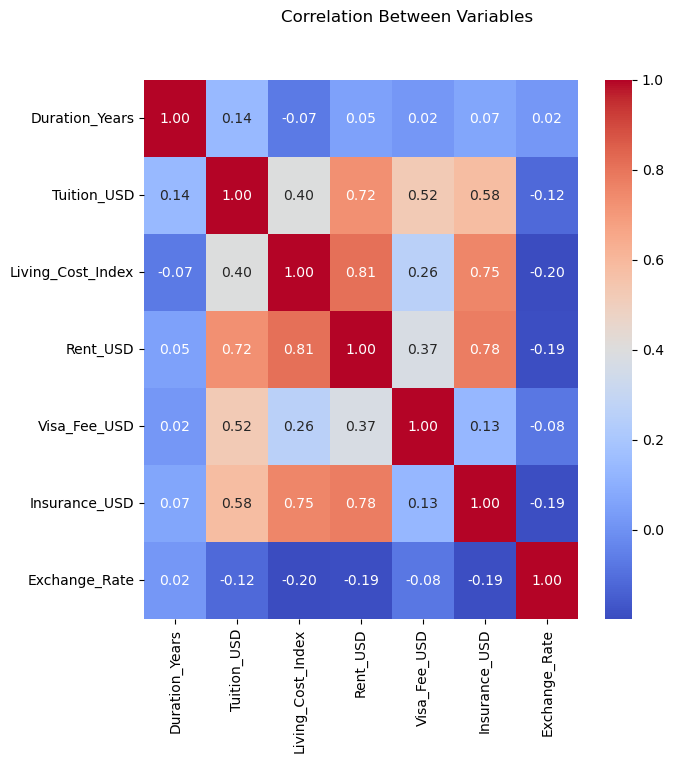

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize = (7,7))
numeric_data = data.select_dtypes(include=["int64", "float64"]).columns
sns.heatmap(data[numeric_data].corr(), annot=True, cmap = "coolwarm", fmt = "0.2f", cbar = True,  linewidths=0)
plt.suptitle("Correlation Between Variables")
plt.show()
plt.savefig("correlation_matrix.png", dpi = 300, bbox_inches = "tight")

Visualize correlations among Tuition_USD, Living_Cost_Index, Rent_USD, and Exchange_Rate.